## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [355]:
import pandas as pd
#
var_list = ['wrkstat', 'prestige','educ','paeduc','maeduc','childs','sibs'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [356]:
df= pd.read_csv('selected_gss_data.csv')
df.head()

,wrkstat,prestige,educ,paeduc,maeduc,childs,sibs
0,working full time,50.0,16.0,10.0,NaN,0.0,3.0
1,retired,45.0,10.0,8.0,8.0,5.0,4.0
2,working part time,44.0,12.0,8.0,8.0,4.0,5.0
3,working full time,57.0,17.0,16.0,12.0,0.0,5.0
4,keeping house,40.0,12.0,8.0,8.0,2.0,2.0


### In the following cells I'm creating labels for the education levels of the responder and their parents. This is mostly for better readability in graphing. First, I create a map for labels listed in GSS and then create a new column for the labels. I didn't want to change the initial educ columns because I need the quantitative data to graph.

### I am also changing NaN values in the educ columns to -99, as they also correspond to "No Answer"

In [358]:
df=df.fillna(-99)

education_labels = {
    -99: "No Answer",
    -98: "Do not Know/Cannot Choose",
    0: "No formal schooling",
    **{i: f"Grade {i}" for i in range(1, 13)},  # mapping 1-12 to grade 1-12
    **{i: f"{i-12} year(s) of college" for i in range(13, 20)},  # mapping 13-19 to college years
    20: "8 or more years of college"
}

df['Education Label'] = df['educ'].map(education_labels)
df['Father Education Label'] = df['paeduc'].map(education_labels)
df['Mother Education Label'] = df['maeduc'].map(education_labels)

df = df.rename(columns={'wrkstat': 'Work Status', 'prestige': 'Prestige', 'educ': 'Responder Education', 'paeduc': 'Father Education','maeduc': 'Mother Education','sibs':'Siblings','childs':'Children'})


df.head()

,Work Status,Prestige,Responder Education,Father Education,Mother Education,Children,Siblings,Education Label,Father Education Label,Mother Education Label
0,working full time,50.0,16.0,10.0,-99.0,0.0,3.0,4 year(s) of college,Grade 10,No Answer
1,retired,45.0,10.0,8.0,8.0,5.0,4.0,Grade 10,Grade 8,Grade 8
2,working part time,44.0,12.0,8.0,8.0,4.0,5.0,Grade 12,Grade 8,Grade 8
3,working full time,57.0,17.0,16.0,12.0,0.0,5.0,5 year(s) of college,4 year(s) of college,Grade 12
4,keeping house,40.0,12.0,8.0,8.0,2.0,2.0,Grade 12,Grade 8,Grade 8


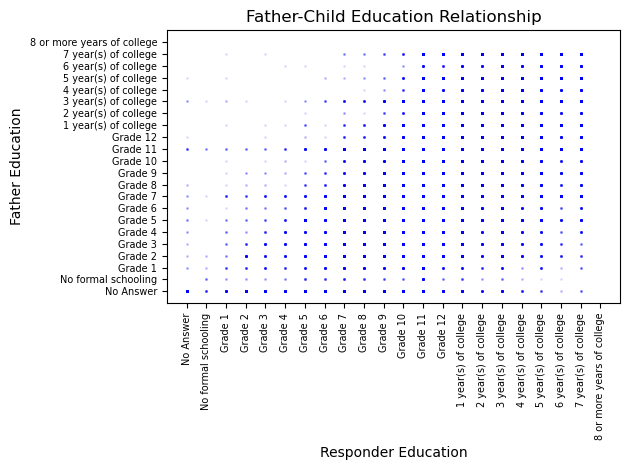

In [304]:
import matplotlib.pyplot as plt

df_xsorted = df.sort_values(by='Responder Education')
df_ysorted = df.sort_values(by='Father Education')

# kind of cheating here to get the labels correct
plt.figure()
plt.scatter(df_xsorted['Education Label'], df_ysorted['Father Education Label'], alpha=0, marker='o', s=2)
plt.scatter(df['Responder Education'],df['Father Education'],color='b',alpha=0.1,marker='o',s=1)
plt.xticks(rotation=90,fontsize=7)
plt.yticks(fontsize=7)

            
plt.xlim(-1,22)
plt.ylim(-1,22)
plt.title('Father-Child Education Relationship')
plt.xlabel('Responder Education')
plt.ylabel('Father Education')
plt.tight_layout()
plt.savefig('father_child_ed.png')


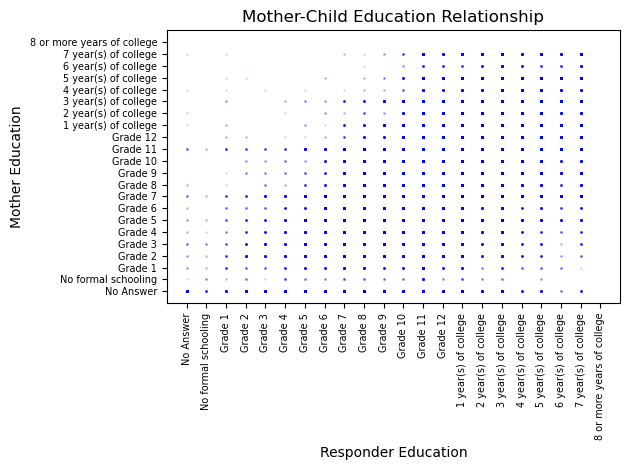

In [305]:
import matplotlib.pyplot as plt

df_xsorted = df.sort_values(by='Responder Education')
df_ysorted = df.sort_values(by='Mother Education')

# kind of cheating here to get the labels correct
plt.figure()
plt.scatter(df_xsorted['Education Label'], df_ysorted['Mother Education Label'], alpha=0, marker='o', s=2)
plt.scatter(df['Responder Education'],df['Mother Education'],color='b',alpha=0.1,marker='o',s=1)
plt.xticks(rotation=90,fontsize=7)
plt.yticks(fontsize=7)

            
plt.xlim(-1,22)
plt.ylim(-1,22)
plt.title('Mother-Child Education Relationship')
plt.xlabel('Responder Education')
plt.ylabel('Mother Education')
plt.tight_layout()
plt.savefig('mother_child_ed.png')


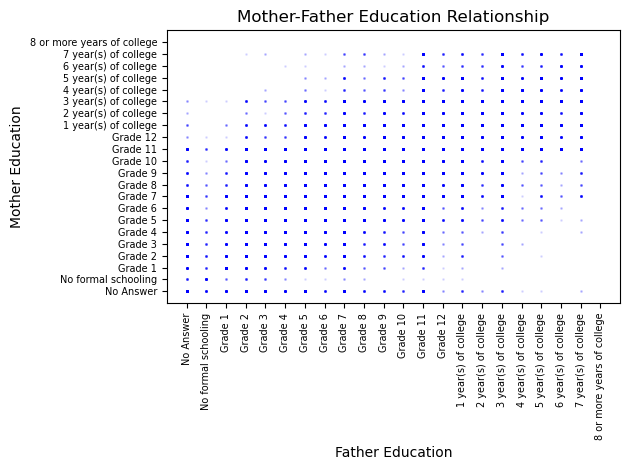

In [306]:
import matplotlib.pyplot as plt

df_xsorted = df.sort_values(by='Father Education')
df_ysorted = df.sort_values(by='Mother Education')

# kind of cheating here to get the labels correct
plt.figure()
plt.scatter(df_xsorted['Father Education Label'], df_ysorted['Mother Education Label'], alpha=0, marker='o', s=2)
plt.scatter(df['Father Education'],df['Mother Education'],color='b',alpha=0.1,marker='o',s=1)
plt.xticks(rotation=90,fontsize=7)
plt.yticks(fontsize=7)

            
plt.xlim(-1,22)
plt.ylim(-1,22)
plt.title('Mother-Father Education Relationship')
plt.xlabel('Father Education')
plt.ylabel('Mother Education')
plt.tight_layout()
plt.savefig('mother_father_ed.png')


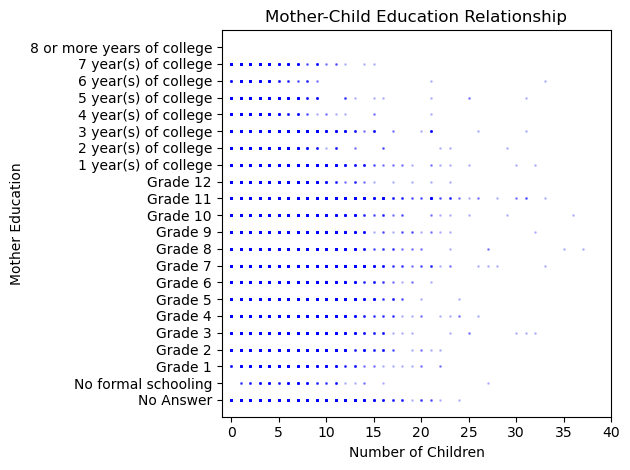

In [307]:
df_xsorted = df.sort_values(by='Mother Education')
df_ysorted = df.sort_values(by='Siblings')

# kind of cheating here to get the labels correct
plt.figure()

plt.scatter(df_ysorted['Siblings'], df_xsorted['Mother Education Label'], alpha=0, marker='o', s=2)
plt.scatter(df['Siblings'],df['Mother Education'],color='b',alpha=0.2,marker='o',s=1)

plt.ylim(-1,22)
plt.xlim(-1,40)
plt.title('Mother-Child Education Relationship')
plt.ylabel('Mother Education')
plt.xlabel('Number of Children')
plt.tight_layout()
plt.savefig('mother_ed_childno.png')

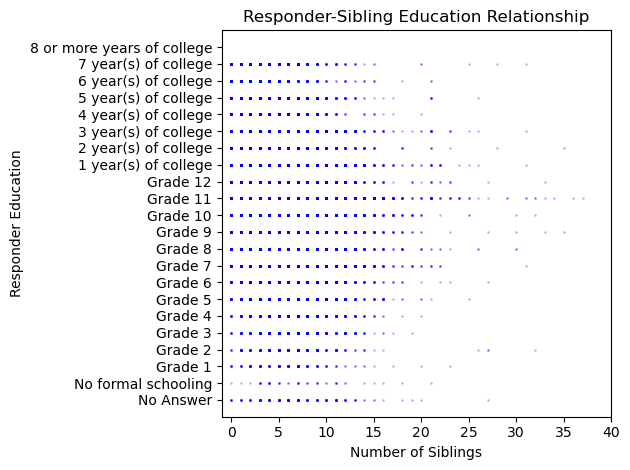

In [308]:
df_xsorted = df.sort_values(by='Siblings')
df_ysorted = df.sort_values(by='Responder Education')

# kind of cheating here to get the labels correct
plt.figure()

plt.scatter(df_xsorted['Siblings'], df_ysorted['Education Label'], alpha=0, marker='o', s=2)
plt.scatter(df['Siblings'],df['Responder Education'],color='b',alpha=0.2,marker='o',s=1)

plt.ylim(-1,22)
plt.xlim(-1,40)
plt.title('Responder-Sibling Education Relationship')
plt.ylabel('Responder Education')
plt.xlabel('Number of Siblings')
plt.tight_layout()
plt.savefig('responder_sibling_ed.png')

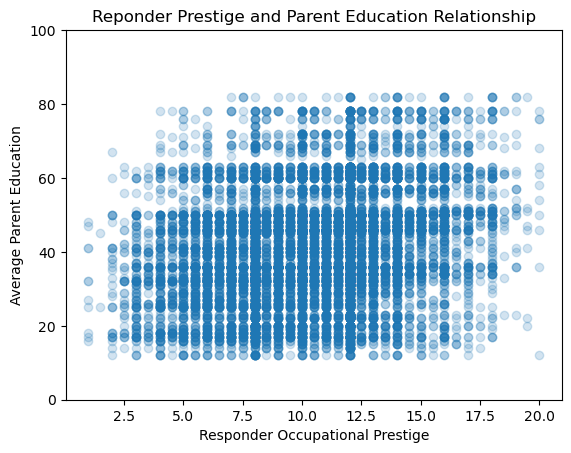

In [406]:
mask = (df['Father Education'] > 0) & (df['Mother Education'] > 0)
parent_means = (df['Father Education'] + df['Mother Education']) / 2

#plt.scatter(df['Prestige'][mask], parent_means[mask],alpha=0.2)
plt.scatter(parent_means[mask],df['Prestige'][mask],alpha=0.2)
plt.xlabel("Responder Occupational Prestige")
plt.ylabel("Average Parent Education")
plt.ylim(0,100)
plt.title('Reponder Prestige and Parent Education Relationship') 
plt.savefig('responder_parent_ed')
plt.show()

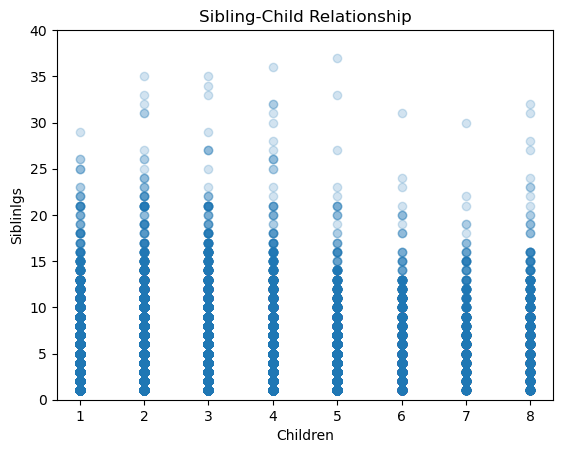

In [396]:
mask = (df['Siblings'] > 0) & (df['Children'] > 0) #excluding any nonnumerical survey answers

plt.scatter(df['Children'][mask], df['Siblings'][mask],alpha=0.2)
plt.xlabel("Children")
plt.ylabel("Siblinlgs")
#plt.xlim(-2,22)
plt.ylim(0,40) #excluding outliers
plt.title('Sibling-Child Relationship') 
plt.tight_layout
plt.savefig('child_sibling.png')
plt.show()